## Sklearn v1.1 & Feature Importance

## The Task

- For this assignment, you will be building a machine learning model to predict car price using all of the provided features.

- Specifically, you will:
    - Preprocess the data as dataframes with feature names using the updated column transformer.
    - Fit and evaluate a Tree Based Model of your choice.
        - Evaluate training and test data using R-squared and RMSE.
    - Extract and Plot the Feature Importances calculated by your model.
        - Answer the Qs:
            - What were your 5 most important features?
            - What does it mean that they were "important"?
    - Apply sklearn's permutation importance and visualize the permutation importances.
        - Answer the Qs:
            - What were your 5 most important features?
            - Are they the same features that your model has as the top 5 important?

DATA Direct Link: https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)


import warnings
warnings.filterwarnings("ignore")

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)


,Column,dtype,# null,null (%),nunique,min,max
0,symboling,int64,0,0.0,6,-2,3
1,fueltype,object,0,0.0,2,diesel,gas
2,aspiration,object,0,0.0,2,std,turbo
3,doornumber,object,0,0.0,2,four,two
4,carbody,object,0,0.0,5,convertible,wagon
5,drivewheel,object,0,0.0,3,4wd,rwd
6,enginelocation,object,0,0.0,2,front,rear
7,wheelbase,float64,0,0.0,53,86.6,120.9
8,carlength,float64,0,0.0,75,141.1,208.1
9,carwidth,float64,0,0.0,44,60.3,72.3


In [6]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)



In [7]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,6,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,4,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [8]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [9]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)


['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [11]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


In [12]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029643BCCFA0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029643B29700>)],
                  verbose_feature_names_out=False)

In [16]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names


array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [17]:
# Remaking Our X_train and X_test as DataFrames with the New Feature Names

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
17,0.0,110.0,197.0,70.9,56.3,3505.0,6.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,0.0,96.5,175.4,65.2,54.1,2304.0,4.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,96.5,175.4,62.5,54.1,2372.0,4.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Now we create a preprocessed DataFrame for our test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,0.0,113.0,199.6,69.6,52.8,4066.0,6.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,-2.0,104.3,188.8,67.2,56.2,2935.0,4.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,0.0,96.9,173.6,65.4,54.9,2420.0,4.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# verify that our X and y values are still matched correctly. 

## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)


48     35550.0
196    15985.0
148     8013.0
Name: price, dtype: float64

In [20]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [21]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)


Training Data:	R^2= 0.99	RMSE= 861.15
Test Data:	R^2= 0.93	RMSE= 2232.46


In [24]:
# Extracting Feature Importance
reg.feature_importances_



array([2.03885591e-03, 3.63703918e-02, 6.51433081e-03, 5.15346496e-02,
       3.90425938e-03, 2.08981195e-01, 1.32244096e-03, 5.43869632e-01,
       4.82139947e-03, 7.43525417e-03, 1.48346122e-02, 2.10200315e-02,
       6.35027660e-03, 1.26306875e-02, 6.74791061e-02, 4.44470493e-04,
       2.02371524e-04, 6.05300823e-04, 4.75019915e-04, 5.21616982e-04,
       3.36048605e-04, 1.71615586e-04, 3.04011822e-04, 2.84701563e-04,
       1.58296586e-03, 2.15077222e-04, 8.84492269e-05, 1.31386330e-03,
       3.96827222e-04, 0.00000000e+00, 2.24722388e-04, 4.83246458e-05,
       2.06471785e-05, 1.17119817e-03, 2.28239931e-05, 7.64169067e-04,
       3.54683432e-05, 8.88814132e-06, 2.46508918e-04, 8.36968473e-05,
       3.06267961e-04, 2.04523796e-05, 9.65880118e-04, 2.30563687e-05,
       8.43294437e-06])

In [25]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances



symboling               0.002039
wheelbase               0.036370
carlength               0.006514
carwidth                0.051535
carheight               0.003904
curbweight              0.208981
cylindernumber          0.001322
enginesize              0.543870
boreratio               0.004821
stroke                  0.007435
compressionratio        0.014835
horsepower              0.021020
peakrpm                 0.006350
citympg                 0.012631
highwaympg              0.067479
fueltype_diesel         0.000444
fueltype_gas            0.000202
aspiration_std          0.000605
aspiration_turbo        0.000475
doornumber_four         0.000522
doornumber_two          0.000336
carbody_convertible     0.000172
carbody_hardtop         0.000304
carbody_hatchback       0.000285
carbody_sedan           0.001583
carbody_wagon           0.000215
drivewheel_4wd          0.000088
drivewheel_fwd          0.001314
drivewheel_rwd          0.000397
enginelocation_front    0.000000
enginetype

In [27]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance


enginelocation_front    0.000000
fuelsystem_spfi         0.000008
fuelsystem_1bbl         0.000009
fuelsystem_mfi          0.000020
enginetype_l            0.000021
enginetype_ohcf         0.000023
fuelsystem_spdi         0.000023
enginetype_rotor        0.000035
enginetype_dohcv        0.000048
fuelsystem_4bbl         0.000084
drivewheel_4wd          0.000088
carbody_convertible     0.000172
fueltype_gas            0.000202
carbody_wagon           0.000215
enginetype_dohc         0.000225
fuelsystem_2bbl         0.000247
carbody_hatchback       0.000285
carbody_hardtop         0.000304
fuelsystem_idi          0.000306
doornumber_two          0.000336
drivewheel_rwd          0.000397
fueltype_diesel         0.000444
aspiration_turbo        0.000475
doornumber_four         0.000522
aspiration_std          0.000605
enginetype_ohcv         0.000764
fuelsystem_mpfi         0.000966
enginetype_ohc          0.001171
drivewheel_fwd          0.001314
cylindernumber          0.001322
carbody_se

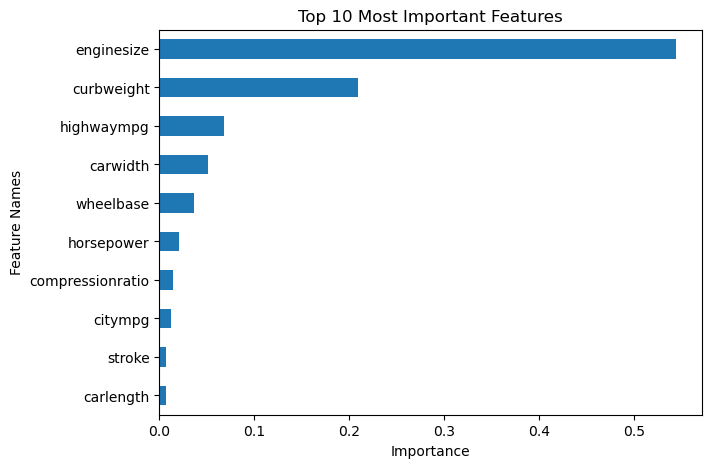

In [28]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');


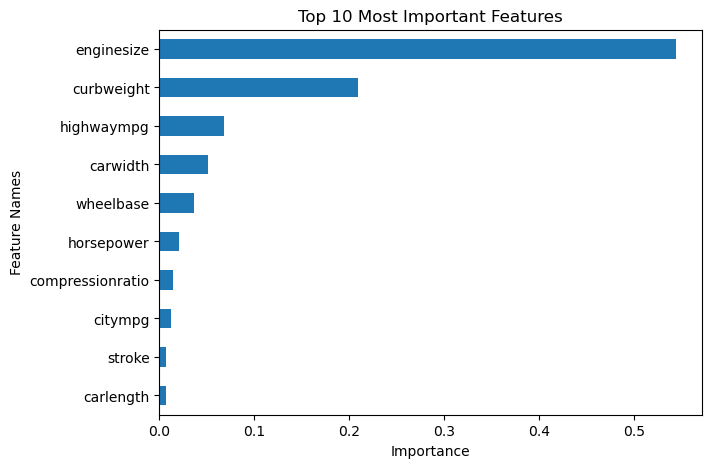

In [32]:
## Saving fig as fig_ax --- using the ax to get the fig
fig_ax = ax.get_figure()

fig_ax


In [34]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances



In [35]:
# Test Function
importances = get_importances(reg,sort=True,ascending=False)
importances


enginesize              0.543870
curbweight              0.208981
highwaympg              0.067479
carwidth                0.051535
wheelbase               0.036370
horsepower              0.021020
compressionratio        0.014835
citympg                 0.012631
stroke                  0.007435
carlength               0.006514
peakrpm                 0.006350
boreratio               0.004821
carheight               0.003904
symboling               0.002039
carbody_sedan           0.001583
cylindernumber          0.001322
drivewheel_fwd          0.001314
enginetype_ohc          0.001171
fuelsystem_mpfi         0.000966
enginetype_ohcv         0.000764
aspiration_std          0.000605
doornumber_four         0.000522
aspiration_turbo        0.000475
fueltype_diesel         0.000444
drivewheel_rwd          0.000397
doornumber_two          0.000336
fuelsystem_idi          0.000306
carbody_hardtop         0.000304
carbody_hatchback       0.000285
fuelsystem_2bbl         0.000247
enginetype

In [36]:
# Custom Function to plot importance

def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax



<Axes: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

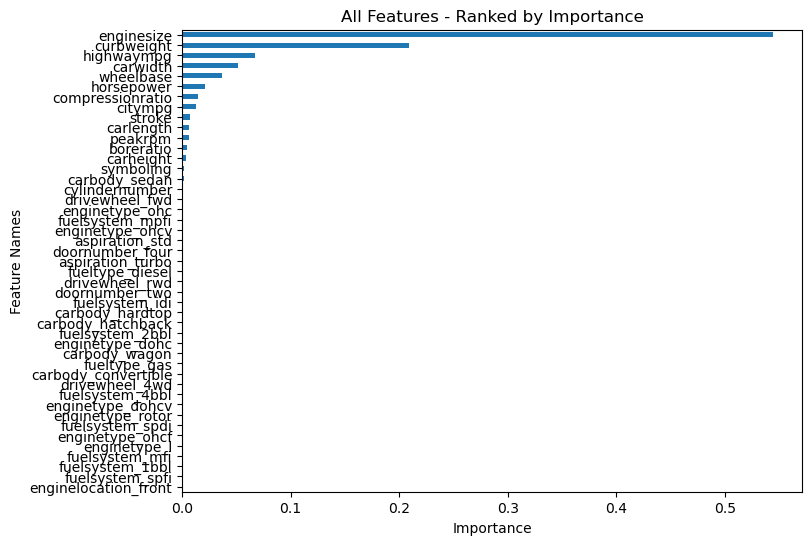

In [37]:
## testing our function
plot_importance(importances)



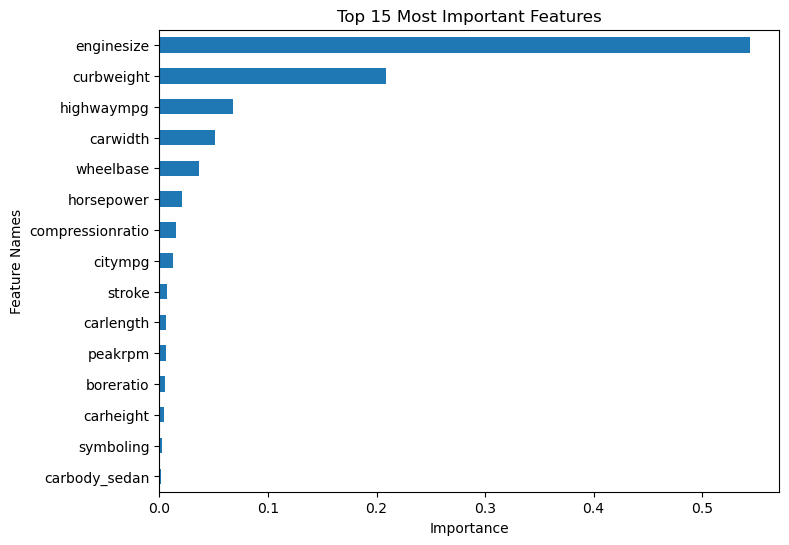

In [38]:
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);


Training Data:	R^2= 0.99	RMSE= 861.15
Test Data:	R^2= 0.93	RMSE= 2232.46


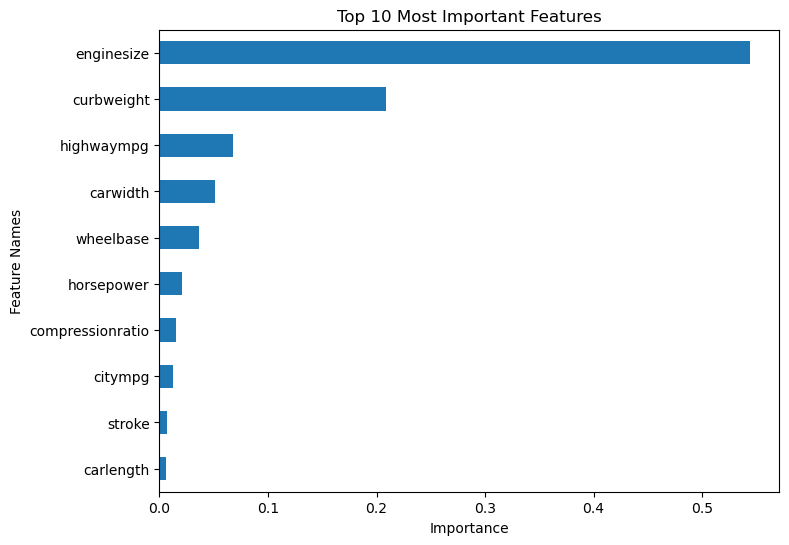

In [39]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);


In [41]:
example_tree =  reg.estimators_[0]
example_tree


DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [42]:
evaluate_regression(example_tree,X_train_df, y_train, X_test_df,y_test)



Training Data:	R^2= 0.94	RMSE= 1831.96
Test Data:	R^2= 0.90	RMSE= 2825.28


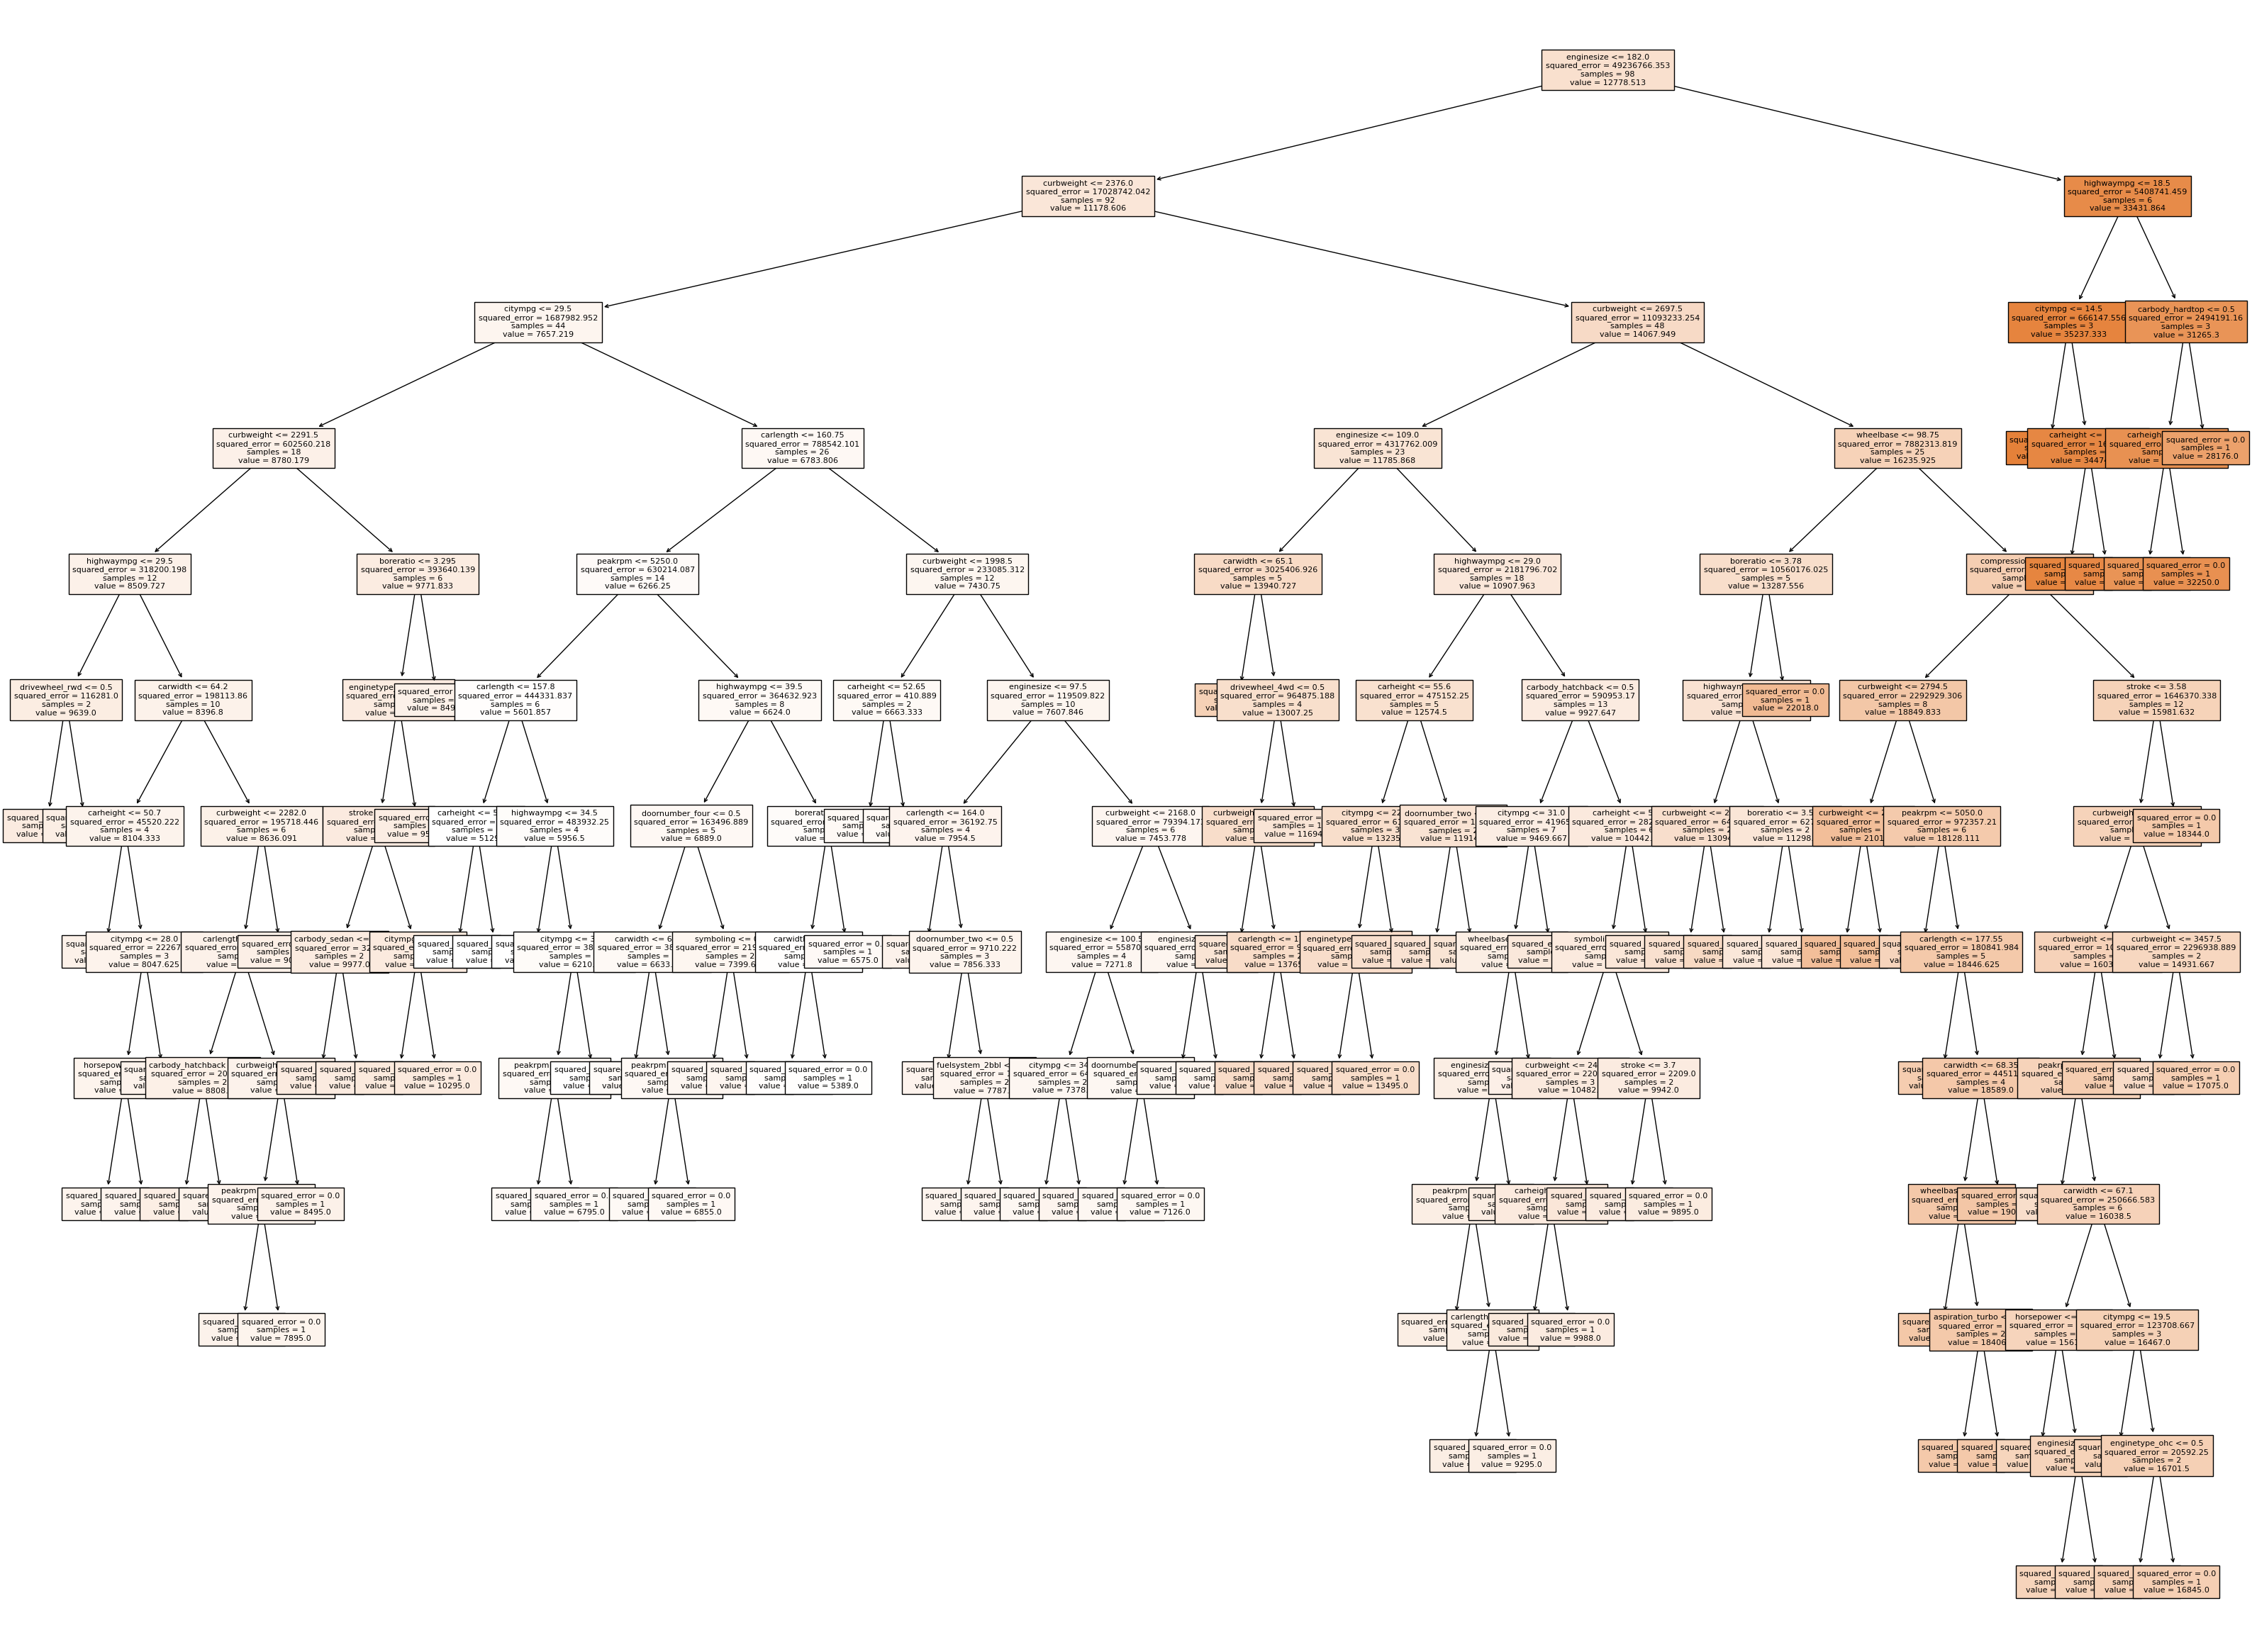

In [43]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, filled=True, feature_names=feature_names,ax=ax, fontsize=8);


In [46]:
reg_B = RandomForestRegressor(random_state = SEED)
reg_B.fit(X_train, y_train)
evaluate_regression(reg_B, X_train, y_train, X_test_B,y_test)
## Saving the feature importances
importances = get_importances(reg_B, sort=True, ascending=False)
plot_importance(importances, top_n=15);


ValueError: could not convert string to float: 'gas'

In [44]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg_B, X_test_B, y_test,n_repeats =5, random_state = SEED)
r.keys()


NameError: name 'reg_B' is not defined